
<a id='0'></a>

# Extensive Analysis - EDA + Preprocessing + FE + Modelling 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = './hack_data/training.csv'
df = pd.read_csv(data, sep=';')

In [3]:
df.shape

(70240, 24)

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
df.drop(['RISK_MM'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70240 entries, 0 to 70239
Data columns (total 23 columns):
Date             70240 non-null object
Location         70240 non-null object
MinTemp          69882 non-null float64
MaxTemp          70080 non-null float64
Rainfall         69428 non-null float64
Evaporation      42191 non-null float64
Sunshine         37113 non-null float64
WindGustDir      65571 non-null object
WindGustSpeed    65579 non-null float64
WindDir9am       63981 non-null object
WindDir3pm       68343 non-null object
WindSpeed9am     69212 non-null float64
WindSpeed3pm     69152 non-null float64
Humidity9am      69185 non-null float64
Humidity3pm      69305 non-null float64
Pressure9am      62341 non-null object
Pressure3pm      62389 non-null object
Cloud9am         45778 non-null float64
Cloud3pm         45115 non-null float64
Temp9am          69502 non-null float64
Temp3pm          69581 non-null float64
RainToday        69428 non-null object
RainTomorrow     70

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,69882.000000,70080.000000,69428.000000,42191.000000,37113.000000,65579.000000,69212.000000,69152.000000,69185.000000,69305.000000,45778.000000,45115.000000,69502.000000,69581.000000
mean,11.355741,22.152277,2.472825,4.925332,7.229785,39.641044,13.557519,18.313801,71.686551,53.264873,4.531478,4.640386,15.879927,20.721841
std,6.292392,6.830980,8.810472,3.614322,3.820706,14.228323,9.242076,9.275690,17.734285,20.350925,2.866080,2.665981,6.202170,6.642916
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,-6.200000,-5.100000
25%,6.800000,17.300000,0.000000,2.400000,4.300000,30.000000,7.000000,11.000000,60.000000,39.000000,1.000000,2.000000,11.400000,16.000000
50%,11.300000,21.700000,0.000000,4.200000,8.000000,37.000000,13.000000,17.000000,72.000000,53.000000,5.000000,5.000000,15.800000,20.300000
75%,16.200000,26.800000,0.800000,6.600000,10.300000,48.000000,19.000000,24.000000,85.000000,67.000000,7.000000,7.000000,20.500000,25.200000
max,30.500000,47.300000,371.000000,64.800000,14.300000,135.000000,87.000000,83.000000,100.000000,100.000000,9.000000,8.000000,37.700000,46.100000


In [8]:
df['RainTomorrow'].isnull().sum()

0

In [9]:
df['RainTomorrow'].value_counts()

No     53973
Yes    16267
Name: RainTomorrow, dtype: int64

In [10]:
df['RainTomorrow'].value_counts()/len(df)

No     0.768408
Yes    0.231592
Name: RainTomorrow, dtype: float64

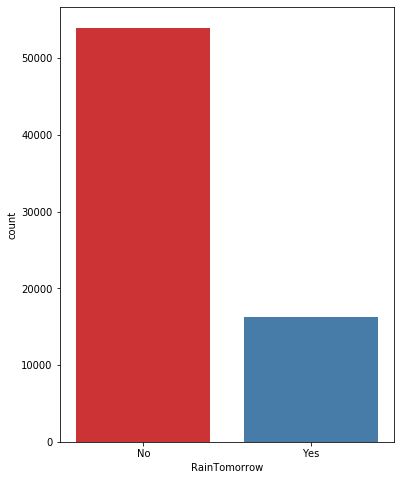

In [11]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

In [12]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 9 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Pressure9am', 'Pressure3pm', 'RainToday', 'RainTomorrow']


In [13]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,1007.7,1007.1,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,1010.6,1007.8,No,No
2,2008-12-03,Albury,WSW,W,WSW,1007.6,1008.7,No,No
3,2008-12-04,Albury,NE,SE,E,1017.6,1012.8,No,No
4,2008-12-05,Albury,W,ENE,NW,1010.8,1006,No,No


In [14]:
df[categorical].isnull().sum()

Date               0
Location           0
WindGustDir     4669
WindDir9am      6259
WindDir3pm      1897
Pressure9am     7899
Pressure3pm     7851
RainToday        812
RainTomorrow       0
dtype: int64

In [15]:
cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

WindGustDir    4669
WindDir9am     6259
WindDir3pm     1897
Pressure9am    7899
Pressure3pm    7851
RainToday       812
dtype: int64


In [16]:
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [18]:
df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [19]:
df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [20]:
df.drop('Date', axis=1, inplace = True)

In [21]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [22]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 8 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Pressure9am', 'Pressure3pm', 'RainToday', 'RainTomorrow']


In [23]:
df[categorical].isnull().sum()

Location           0
WindGustDir     4669
WindDir9am      6259
WindDir3pm      1897
Pressure9am     7899
Pressure3pm     7851
RainToday        812
RainTomorrow       0
dtype: int64

In [24]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns'],
      dtype=object)

In [25]:
df.Location.value_counts()

Canberra            2733
Sydney              2669
Brisbane            2528
Bendigo             2426
Ballarat            2421
Albury              2407
MelbourneAirport    2406
Mildura             2405
SydneyAirport       2403
Sale                2399
Watsonia            2398
Tuggeranong         2398
Portland            2396
Cairns              2389
Cobar               2389
Wollongong          2385
WaggaWagga          2380
NorfolkIsland       2370
Penrith             2369
Newcastle           2363
CoffsHarbour        2361
Richmond            2360
Dartmoor            2353
NorahHead           2342
BadgerysCreek       2341
MountGinini         2325
Moree               2282
Williamtown         2041
Melbourne           1947
Nhil                1254
Name: Location, dtype: int64

In [26]:
pd.get_dummies(df.Location, drop_first=True).head()

,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Melbourne,...,Portland,Richmond,Sale,Sydney,SydneyAirport,Tuggeranong,WaggaWagga,Watsonia,Williamtown,Wollongong
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 17 labels


In [28]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [29]:
df.WindGustDir.value_counts()

W      5598
S      5079
N      4944
WSW    4562
SSE    4354
WNW    4299
SE     4209
SSW    4202
SW     4199
E      4018
ENE    3818
NE     3709
NNE    3562
NW     3434
ESE    3049
NNW    2535
Name: WindGustDir, dtype: int64

In [30]:
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [31]:
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE    3818
ESE    3049
N      4944
NE     3709
NNE    3562
NNW    2535
NW     3434
S      5079
SE     4209
SSE    4354
SSW    4202
SW     4199
W      5598
WNW    4299
WSW    4562
NaN    4669
dtype: int64

In [32]:
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [33]:
df['WindDir9am'].value_counts()

N      5909
W      4999
SW     4943
SSE    4477
S      4426
NW     4245
SSW    4060
WNW    4040
WSW    3920
SE     3792
NNE    3680
E      3339
NE     3174
NNW    3171
ENE    3149
ESE    2657
Name: WindDir9am, dtype: int64

In [34]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE    3149
ESE    2657
N      5909
NE     3174
NNE    3680
NNW    3171
NW     4245
S      4426
SE     3792
SSE    4477
SSW    4060
SW     4943
W      4999
WNW    4040
WSW    3920
NaN    6259
dtype: int64

In [36]:
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [37]:
df['WindDir3pm'].value_counts()

SE     5423
S      5202
W      5123
NE     4849
N      4693
WNW    4429
SSE    4264
E      4216
WSW    4200
NW     3929
SW     3924
SSW    3887
ESE    3809
NNE    3615
ENE    3588
NNW    3192
Name: WindDir3pm, dtype: int64

In [38]:
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [39]:
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE    3588
ESE    3809
N      4693
NE     4849
NNE    3615
NNW    3192
NW     3929
S      5202
SE     5423
SSE    4264
SSW    3887
SW     3924
W      5123
WNW    4429
WSW    4200
NaN    1897
dtype: int64

In [40]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [41]:
df.RainToday.value_counts()

No     53415
Yes    16013
Name: RainToday, dtype: int64

In [42]:
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [43]:
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

Yes    16013
NaN      812
dtype: int64

In [44]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 17 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [45]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,7.0,8.0,17.8,29.7,2008,12,5


### Missing values in numerical variables

In [46]:
df[numerical].isnull().sum()

MinTemp            358
MaxTemp            160
Rainfall           812
Evaporation      28049
Sunshine         33127
WindGustSpeed     4661
WindSpeed9am      1028
WindSpeed3pm      1088
Humidity9am       1055
Humidity3pm        935
Cloud9am         24462
Cloud3pm         25125
Temp9am            738
Temp3pm            659
Year                 0
Month                0
Day                  0
dtype: int64

Text(0, 0.5, 'WindSpeed3pm')

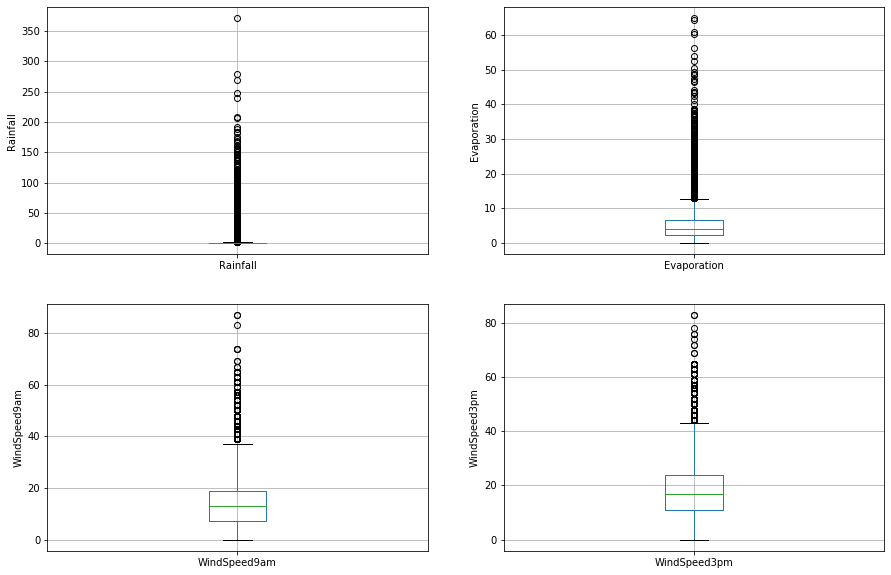

In [47]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

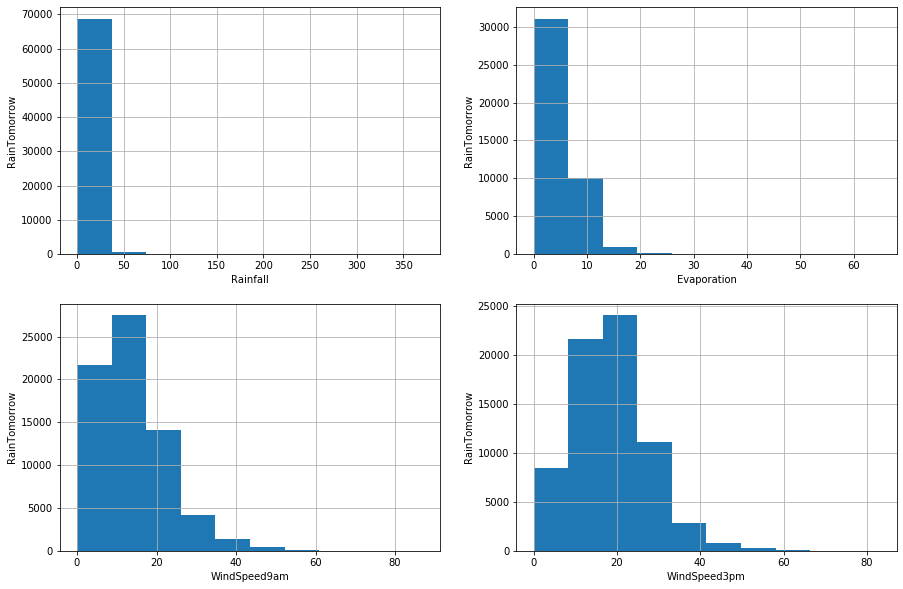

In [48]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [49]:
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Rainfall outliers are values < -2.4000000000000004 or > 3.2


For `Rainfall`, the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 3.2.

In [50]:
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Evaporation outliers are values < -10.199999999999998 or > 19.199999999999996


In [51]:
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed9am outliers are values < -29.0 or > 55.0


In [52]:
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed3pm outliers are values < -28.0 or > 63.0


In [53]:
correlation = df.corr()

### Heat Map <a class="anchor" id="7.1"></a>

In [54]:
# plt.figure(figsize=(16,12))
# plt.title('Correlation Heatmap of Rain in Australia Dataset')
# ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
# plt.show()

In [55]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

In [56]:
# sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
# plt.show()

In [57]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [59]:
X_train.shape, X_test.shape

((56192, 24), (14048, 24))

In [60]:
X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am       object
Pressure3pm       object
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [61]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'Pressure9am',
 'Pressure3pm',
 'RainToday']

In [62]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [63]:
X_train[numerical].isnull().sum()

MinTemp            287
MaxTemp            136
Rainfall           656
Evaporation      22505
Sunshine         26564
WindGustSpeed     3758
WindSpeed9am       819
WindSpeed3pm       883
Humidity9am        843
Humidity3pm        769
Cloud9am         19534
Cloud3pm         20079
Temp9am            585
Temp3pm            539
Year                 0
Month                0
Day                  0
dtype: int64

In [64]:
X_test[numerical].isnull().sum()

MinTemp            71
MaxTemp            24
Rainfall          156
Evaporation      5544
Sunshine         6563
WindGustSpeed     903
WindSpeed9am      209
WindSpeed3pm      205
Humidity9am       212
Humidity3pm       166
Cloud9am         4928
Cloud3pm         5046
Temp9am           153
Temp3pm           120
Year                0
Month               0
Day                 0
dtype: int64

In [65]:
for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

MinTemp 0.0051
MaxTemp 0.0024
Rainfall 0.0117
Evaporation 0.4005
Sunshine 0.4727
WindGustSpeed 0.0669
WindSpeed9am 0.0146
WindSpeed3pm 0.0157
Humidity9am 0.015
Humidity3pm 0.0137
Cloud9am 0.3476
Cloud3pm 0.3573
Temp9am 0.0104
Temp3pm 0.0096


In [66]:
for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)           
      

In [67]:
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [68]:
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [69]:
X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.066985
WindDir9am     0.089301
WindDir3pm     0.026997
Pressure9am    0.113486
Pressure3pm    0.112899
RainToday      0.011674
dtype: float64

In [70]:
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

WindGustDir 0.06698462414578588
WindDir9am 0.08930096810933941
WindDir3pm 0.026996725512528474
Pressure9am 0.11348590546697039
Pressure3pm 0.1128986332574032
RainToday 0.011674259681093395


In [71]:
for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [72]:
X_train[categorical].isnull().sum()

Location          0
WindGustDir       0
WindDir9am        0
WindDir3pm        0
Pressure9am    6377
Pressure3pm    6344
RainToday         0
dtype: int64

In [73]:
X_test[categorical].isnull().sum()

Location          0
WindGustDir       0
WindDir9am        0
WindDir3pm        0
Pressure9am    1522
Pressure3pm    1507
RainToday         0
dtype: int64

In [74]:
X_train.isnull().sum()

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am      6377
Pressure3pm      6344
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
Year                0
Month               0
Day                 0
dtype: int64

In [75]:
X_test.isnull().sum()

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am      1522
Pressure3pm      1507
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
Year                0
Month               0
Day                 0
dtype: int64

In [76]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [77]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [78]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [79]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [80]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [81]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000
mean,11.361489,22.146108,0.700785,4.615566,7.588646,39.462806,13.522227,18.277015,71.754467,53.315152,4.696096,4.764272,15.876148,20.711363,2011.852719,6.446291,15.716970
std,6.267585,6.809383,1.197372,2.620237,2.803745,13.780334,9.147620,9.187108,17.607106,20.207547,2.327608,2.146465,6.160573,6.595156,2.059270,3.370888,8.814019
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,-6.200000,-5.100000,2007.000000,1.000000,1.000000
25%,6.900000,17.300000,0.000000,3.600000,7.700000,30.000000,7.000000,11.000000,60.000000,39.000000,3.000000,4.000000,11.400000,16.100000,2010.000000,4.000000,8.000000
50%,11.300000,21.700000,0.000000,4.200000,8.000000,37.000000,13.000000,17.000000,72.000000,53.000000,5.000000,5.000000,15.800000,20.300000,2012.000000,6.000000,16.000000
75%,16.200000,26.800000,0.800000,5.000000,8.300000,46.000000,19.000000,24.000000,85.000000,67.000000,7.000000,6.000000,20.400000,25.100000,2014.000000,9.000000,23.000000
max,30.500000,47.300000,3.200000,21.800000,14.300000,135.000000,55.000000,57.000000,100.000000,100.000000,9.000000,8.000000,37.700000,46.100000,2016.000000,12.000000,31.000000


In [82]:
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'Pressure9am',
 'Pressure3pm',
 'RainToday']

In [83]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,Pressure9am,Pressure3pm,RainToday
55271,Mildura,S,N,N,1007.8,1004.9,No
24191,Sydney,W,W,ENE,1017.7,1012.6,No
59883,Portland,W,WSW,W,1005.8,1004,No
67317,Brisbane,SSE,S,SW,1018.8,1016.5,No
30684,WaggaWagga,W,ENE,NNE,1026.4,1022.4,No


In [84]:
# X_train['RainToday'] = X_train['RainToday'].apply(lambda x: int(x == 'Yes'))
# X_test['RainToday'] = X_test['RainToday'].apply(lambda x: int(x == 'Yes'))

In [85]:
# import category_encoders as ce

# encoder = ce.BinaryEncoder(cols=['RainToday'])

# X_train = encoder.fit_transform(X_train)

# X_test = encoder.transform(X_test)

In [86]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
55271,Mildura,16.9,37.6,0.0,9.0,12.3,S,59.0,N,N,...,1007.8,1004.9,1.0,1.0,22.8,34.9,No,2011,1,25
24191,Sydney,10.9,25.6,0.0,5.4,11.0,W,37.0,W,ENE,...,1017.7,1012.6,2.0,3.0,18.4,22.0,No,2009,9,30
59883,Portland,12.5,16.9,0.0,4.0,8.5,W,83.0,WSW,W,...,1005.8,1004,8.0,8.0,14.0,14.7,No,2013,12,9
67317,Brisbane,22.7,25.6,0.8,6.0,0.5,SSE,22.0,S,SW,...,1018.8,1016.5,7.0,8.0,25.1,24.3,No,2014,3,30
30684,WaggaWagga,9.6,29.2,0.0,5.0,12.0,W,22.0,ENE,NNE,...,1026.4,1022.4,5.0,5.0,16.3,27.2,No,2014,10,19


In [87]:
X_train = pd.concat([X_train[numerical], 
                     pd.get_dummies(X_train.RainToday),
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [88]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
55271,16.9,37.6,0.0,9.0,12.3,59.0,0.0,15.0,54.0,33.0,...,0,0,0,0,0,0,0,0,0,0
24191,10.9,25.6,0.0,5.4,11.0,37.0,9.0,20.0,57.0,34.0,...,0,0,0,0,0,0,0,0,0,0
59883,12.5,16.9,0.0,4.0,8.5,83.0,17.0,33.0,74.0,72.0,...,0,0,0,0,0,0,0,1,0,0
67317,22.7,25.6,0.8,6.0,0.5,22.0,6.0,4.0,88.0,87.0,...,0,0,0,0,0,0,1,0,0,0
30684,9.6,29.2,0.0,5.0,12.0,22.0,15.0,6.0,58.0,21.0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
X_test = pd.concat([X_test[numerical],
                     pd.get_dummies(X_test.RainToday),
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [90]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
15704,7.6,18.6,0.0,4.2,8.0,31.0,24.0,7.0,55.0,42.0,...,0,0,0,0,0,0,0,1,0,0
32506,9.6,24.3,0.0,4.2,8.0,33.0,6.0,24.0,57.0,41.0,...,0,0,0,0,0,0,0,0,0,0
16861,18.1,24.4,1.0,6.4,10.9,43.0,24.0,20.0,51.0,45.0,...,0,0,1,0,0,0,0,0,0,0
16201,20.3,22.0,3.2,4.2,8.0,52.0,39.0,28.0,89.0,95.0,...,0,0,0,1,0,0,0,0,0,0
54039,12.5,27.7,0.0,7.6,12.6,46.0,19.0,28.0,60.0,45.0,...,0,0,1,0,0,0,0,0,0,0


In [91]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000,...,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000,56192.000000
mean,11.361489,22.146108,0.700785,4.615566,7.588646,39.462806,13.522227,18.277015,71.754467,53.315152,...,0.045113,0.056432,0.073872,0.104677,0.060542,0.055595,0.056040,0.072555,0.062500,0.059510
std,6.267585,6.809383,1.197372,2.620237,2.803745,13.780334,9.147620,9.187108,17.607106,20.207547,...,0.207554,0.230755,0.261564,0.306139,0.238491,0.229140,0.230001,0.259407,0.242064,0.236579
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.900000,17.300000,0.000000,3.600000,7.700000,30.000000,7.000000,11.000000,60.000000,39.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.300000,21.700000,0.000000,4.200000,8.000000,37.000000,13.000000,17.000000,72.000000,53.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.200000,26.800000,0.800000,5.000000,8.300000,46.000000,19.000000,24.000000,85.000000,67.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.500000,47.300000,3.200000,21.800000,14.300000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
cols = X_train.columns

In [93]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [94]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [95]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [96]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(solver='liblinear', random_state=0)


logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [98]:
logreg.predict_proba(X_test)[:,0]

array([0.97975563, 0.94006607, 0.97036181, ..., 0.94796056, 0.89833356,
       0.85645982])

In [99]:
logreg.predict_proba(X_test)[:,1]

array([0.02024437, 0.05993393, 0.02963819, ..., 0.05203944, 0.10166644,
       0.14354018])

In [100]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8369


In [101]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array(['No', 'No', 'Yes', ..., 'Yes', 'No', 'Yes'], dtype=object)

In [102]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8394


In [103]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8394
Test set score: 0.8369


In [104]:
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


logreg100.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8394
Test set score: 0.8368


In [106]:
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8295
Test set score: 0.8265


In [108]:
y_test.value_counts()

No     10814
Yes     3234
Name: RainTomorrow, dtype: int64

In [109]:
null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


In [110]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[10198   616]
 [ 1675  1559]]

True Positives(TP) =  10198

True Negatives(TN) =  1559

False Positives(FP) =  616

False Negatives(FN) =  1675


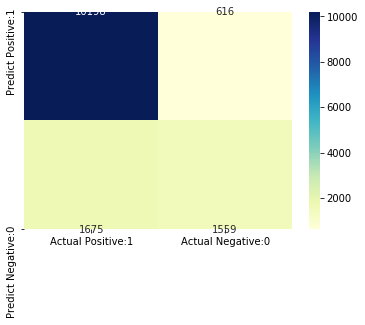

In [111]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [112]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.86      0.94      0.90     10814
         Yes       0.72      0.48      0.58      3234

    accuracy                           0.84     14048
   macro avg       0.79      0.71      0.74     14048
weighted avg       0.83      0.84      0.82     14048



In [113]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [114]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.8369


In [115]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.1631


In [116]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.9430


In [117]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8589


In [118]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8589


In [119]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2832


In [120]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7168


In [121]:
y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.97975563, 0.02024437],
       [0.94006607, 0.05993393],
       [0.97036181, 0.02963819],
       [0.25766429, 0.74233571],
       [0.95340632, 0.04659368],
       [0.97960113, 0.02039887],
       [0.9886112 , 0.0113888 ],
       [0.7949866 , 0.2050134 ],
       [0.60692173, 0.39307827],
       [0.98809293, 0.01190707]])

In [122]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.979756,0.020244
1,0.940066,0.059934
2,0.970362,0.029638
3,0.257664,0.742336
4,0.953406,0.046594
5,0.979601,0.020399
6,0.988611,0.011389
7,0.794987,0.205013
8,0.606922,0.393078
9,0.988093,0.011907


In [123]:
logreg.predict_proba(X_test)[0:10, 1]

array([0.02024437, 0.05993393, 0.02963819, 0.74233571, 0.04659368,
       0.02039887, 0.0113888 , 0.2050134 , 0.39307827, 0.01190707])

In [124]:
y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

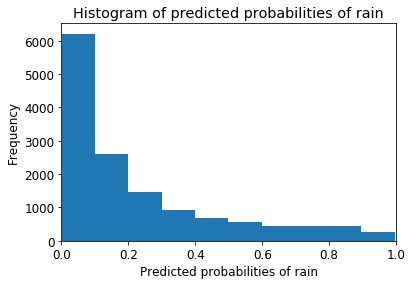

In [125]:
plt.rcParams['font.size'] = 12


plt.hist(y_pred1, bins = 10)


plt.title('Histogram of predicted probabilities of rain')


plt.xlim(0,1)


plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

In [126]:
from sklearn.preprocessing import binarize

for i in range(1,5):
    
    cm1=0
    
    y_pred1 = logreg.predict_proba(X_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, i/10)
    
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
    
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[5891 4923]
 [ 275 2959]] 

 with 8850 correct predictions,  

 4923 Type I errors( False Positives),  

 275 Type II errors( False Negatives),  

 Accuracy score:  0.6299829157175398 

 Sensitivity:  0.9149659863945578 

 Specificity:  0.5447567967449602 



With 0.2 threshold the Confusion Matrix is  

 [[8100 2714]
 [ 690 2544]] 

 with 10644 correct predictions,  

 2714 Type I errors( False Positives),  

 690 Type II errors( False Negatives),  

 Accuracy score:  0.7576879271070615 

 Sensitivity:  0.7866419294990723 

 Specificity:  0.7490290364342519 



With 0.3 threshold the Confusion Matrix is  

 [[9220 1594]
 [1035 2199]] 

 with 11419 correct predictions,  

 1594 Type I errors( False Positives),  

 1035 Type II errors( False Negatives),  

 Accuracy score:  0.8128559225512528 

 Sensitivity:  0.6799628942486086 

 Specificity:  0.852598483447383 



With 0.4 threshold the Confusion Matrix is  

 [[9816  998]
 [1359 1875]] 

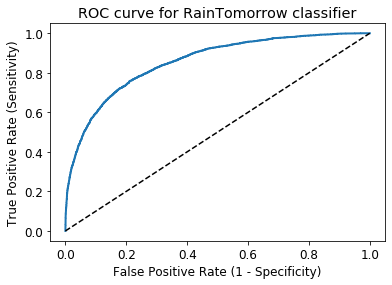

In [127]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [128]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8544


In [129]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8558


In [130]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=logreg, step=1, cv=5, scoring='accuracy')

rfecv = rfecv.fit(X_train, y_train)

In [131]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 52


In [132]:
X_train_rfecv = rfecv.transform(X_train)


logreg.fit(X_train_rfecv, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
X_test_rfecv = rfecv.transform(X_test)

y_pred_rfecv = logreg.predict(X_test_rfecv)

In [134]:
print ("Classifier score: {:.4f}".format(logreg.score(X_test_rfecv,y_test)))

Classifier score: 0.8368


In [135]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred_rfecv)

print('Confusion matrix\n\n', cm1)

print('\nTrue Positives(TP1) = ', cm1[0,0])

print('\nTrue Negatives(TN1) = ', cm1[1,1])

print('\nFalse Positives(FP1) = ', cm1[0,1])

print('\nFalse Negatives(FN1) = ', cm1[1,0])

Confusion matrix

 [[10195   619]
 [ 1673  1561]]

True Positives(TP1) =  10195

True Negatives(TN1) =  1561

False Positives(FP1) =  619

False Negatives(FN1) =  1673


In [136]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84162292 0.83583949 0.84100009 0.83618082 0.83892498]


In [137]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8387


In [138]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [139]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8387


Parameters that give the best results : 

 {'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [140]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8369
